# **Setting & Introduction**

## **1. Github 연동**

In [ ]:
""" github 연동 """
!git clone https://github.com/ku-sungsukim/2025-LGElec-Day2.git ### colab 사용시

' github 연동 '

## **2. About Jupyter Notebook**

In [2]:
# !pip install IPython
from IPython.display import Image

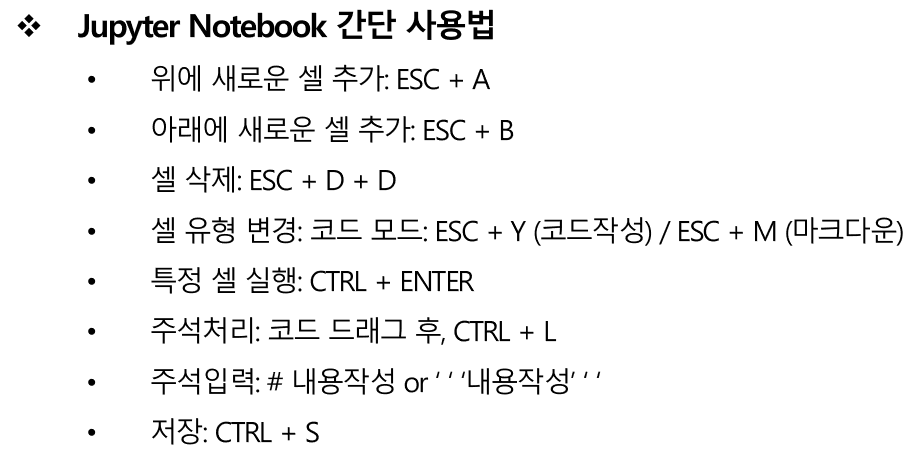

In [ ]:
""" 설명 장표 불러오기 """
# Image('image/image2.PNG') ### 로컬 사용시
Image('/content/2025-LGElec-Day2/image/image2.PNG') ### colab 사용시

## **3. 강의목차**

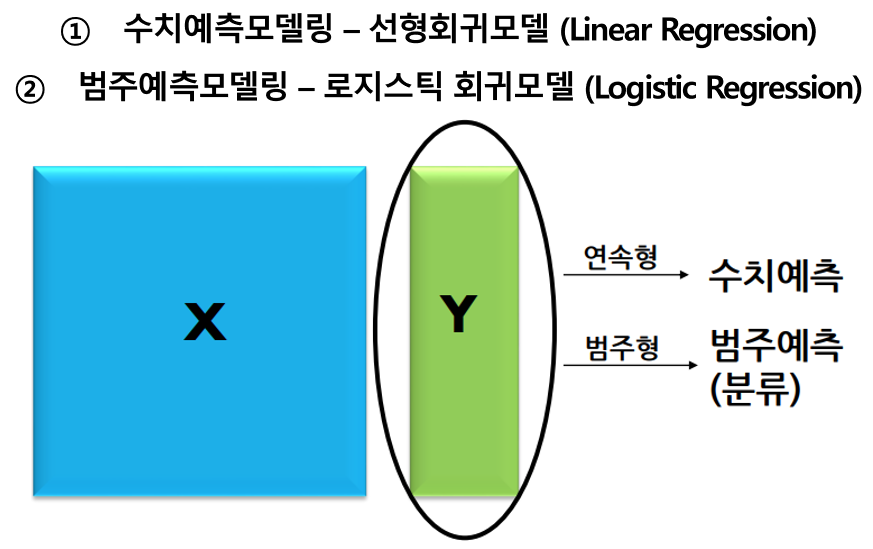

In [ ]:
""" 설명 장표 불러오기 """
# Image('image/image3.PNG') ### 로컬 사용시
Image('/content/2025-LGElec-Day2/image/image3.PNG') ### colab 사용시

# **실습**

#### **1. 데이터 핸들링 및 탐색적 데이터 분석**
 - 데이터 개요 파악

 - 탐색적 데이터 분석

 - 데이터 전처리

#### **2. 데이터 분할 및 스케일링**

#### **3. 모델링**
 - 모델 수립

 - β값을 활용한 결과 분석

 - 수식에 의한 β값 직접 계산

 - cutoff에 따른 모델 성능 비교

## **0. 필요 패키지 불러오기**

In [5]:
""" 데이터처리 관련 패키지 """
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler


""" 기계학습 모델 구축 및 평가 패키지 """
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score


""" 데이터 시각화 패키지 """
import matplotlib.pyplot as plt


""" 경고 숨기기 """
import warnings
warnings.filterwarnings(action='ignore')

## **1. 데이터 핸들링 및 탐색적 데이터 분석**
 - 분석데이터: 유방암 여부 예측 데이터셋 (https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

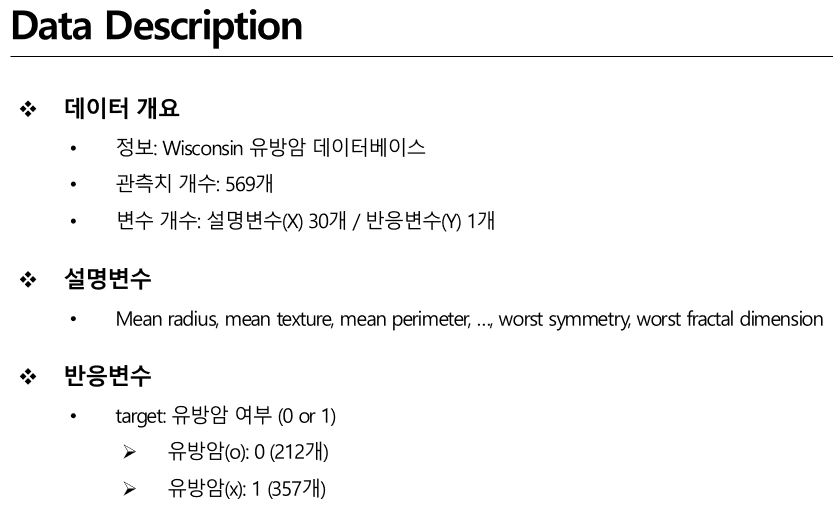

In [ ]:
""" 설명 장표 불러오기 """
# Image('image/image10.PNG') ### 로컬 사용시
Image('/content/2025-LGElec-Day2/image/image10.PNG') ### colab 사용시

#### **1-1. 데이터 불러오기 및 개요 파악**

In [7]:
""" 데이터 불러오기 """
breast_cancer = load_breast_cancer()
breast_cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [8]:
""" 데이터 개요 확인 """
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [9]:
""" X변수 실제값 확인 """
breast_cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [10]:
""" X변수명 확인"""
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
""" Y변수 실제값 확인 """
breast_cancer.target[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1])

In [12]:
""" Y변수 Class 확인 """

"""
0: malignant (유방암 (0))
1: benign (유방암 (X))
"""

breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [13]:
""" Y변수 Class 변경 """

"""
일반적으로 이진분류에서는 "0: 정상 // 1: 불량"의 의미로 모델링을 수행
 - 그러나 현재는 malignant = 0, benign = 1로 처리되어 있는 상황
 - 해당 단계에서는 malignant = 1, benign = 0 으로 바꾸고자 함
  --> P(Y=0) : 유방암이 아닐 확률
  --> P(Y=1) : 유방암일 확률
"""

breast_cancer.target = np.where(breast_cancer.target==0, 1, 0) ### 조건(target==0) 만족 시 1로 대체, 만족하지 않을 경우 0으로 대체

In [14]:
""" 수정된 Y변수 실제값 확인 """
breast_cancer.target[:50]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0])

In [15]:
""" X변수와 Y변수의 크기 확인 """
print(f'input X shape: {breast_cancer.data.shape}')
print(f'target Y shape: {breast_cancer.target.shape}')

input X shape: (569, 30)
target Y shape: (569,)


In [16]:
""" X, Y 데이터프레임화 """
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = pd.DataFrame(breast_cancer.target, columns=['target'])
data = pd.concat([X, y], axis=1)
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [17]:
""" 데이터 결측치 여부 및 변수 타입 확인 """
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [18]:
""" 각 변수별 통계량 확인 """
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [19]:
""" Y Class 별 데이터 개수 확인 """
malignant = data[data['target'] == 1]
benign = data[data['target'] == 0]

print(f'malignant(유방암): {malignant.shape}')
print(f'benign(정상): {benign.shape}')

malignant(유방암): (212, 31)
benign(정상): (357, 31)


#### **1-2. 탐색적 데이터 분석**

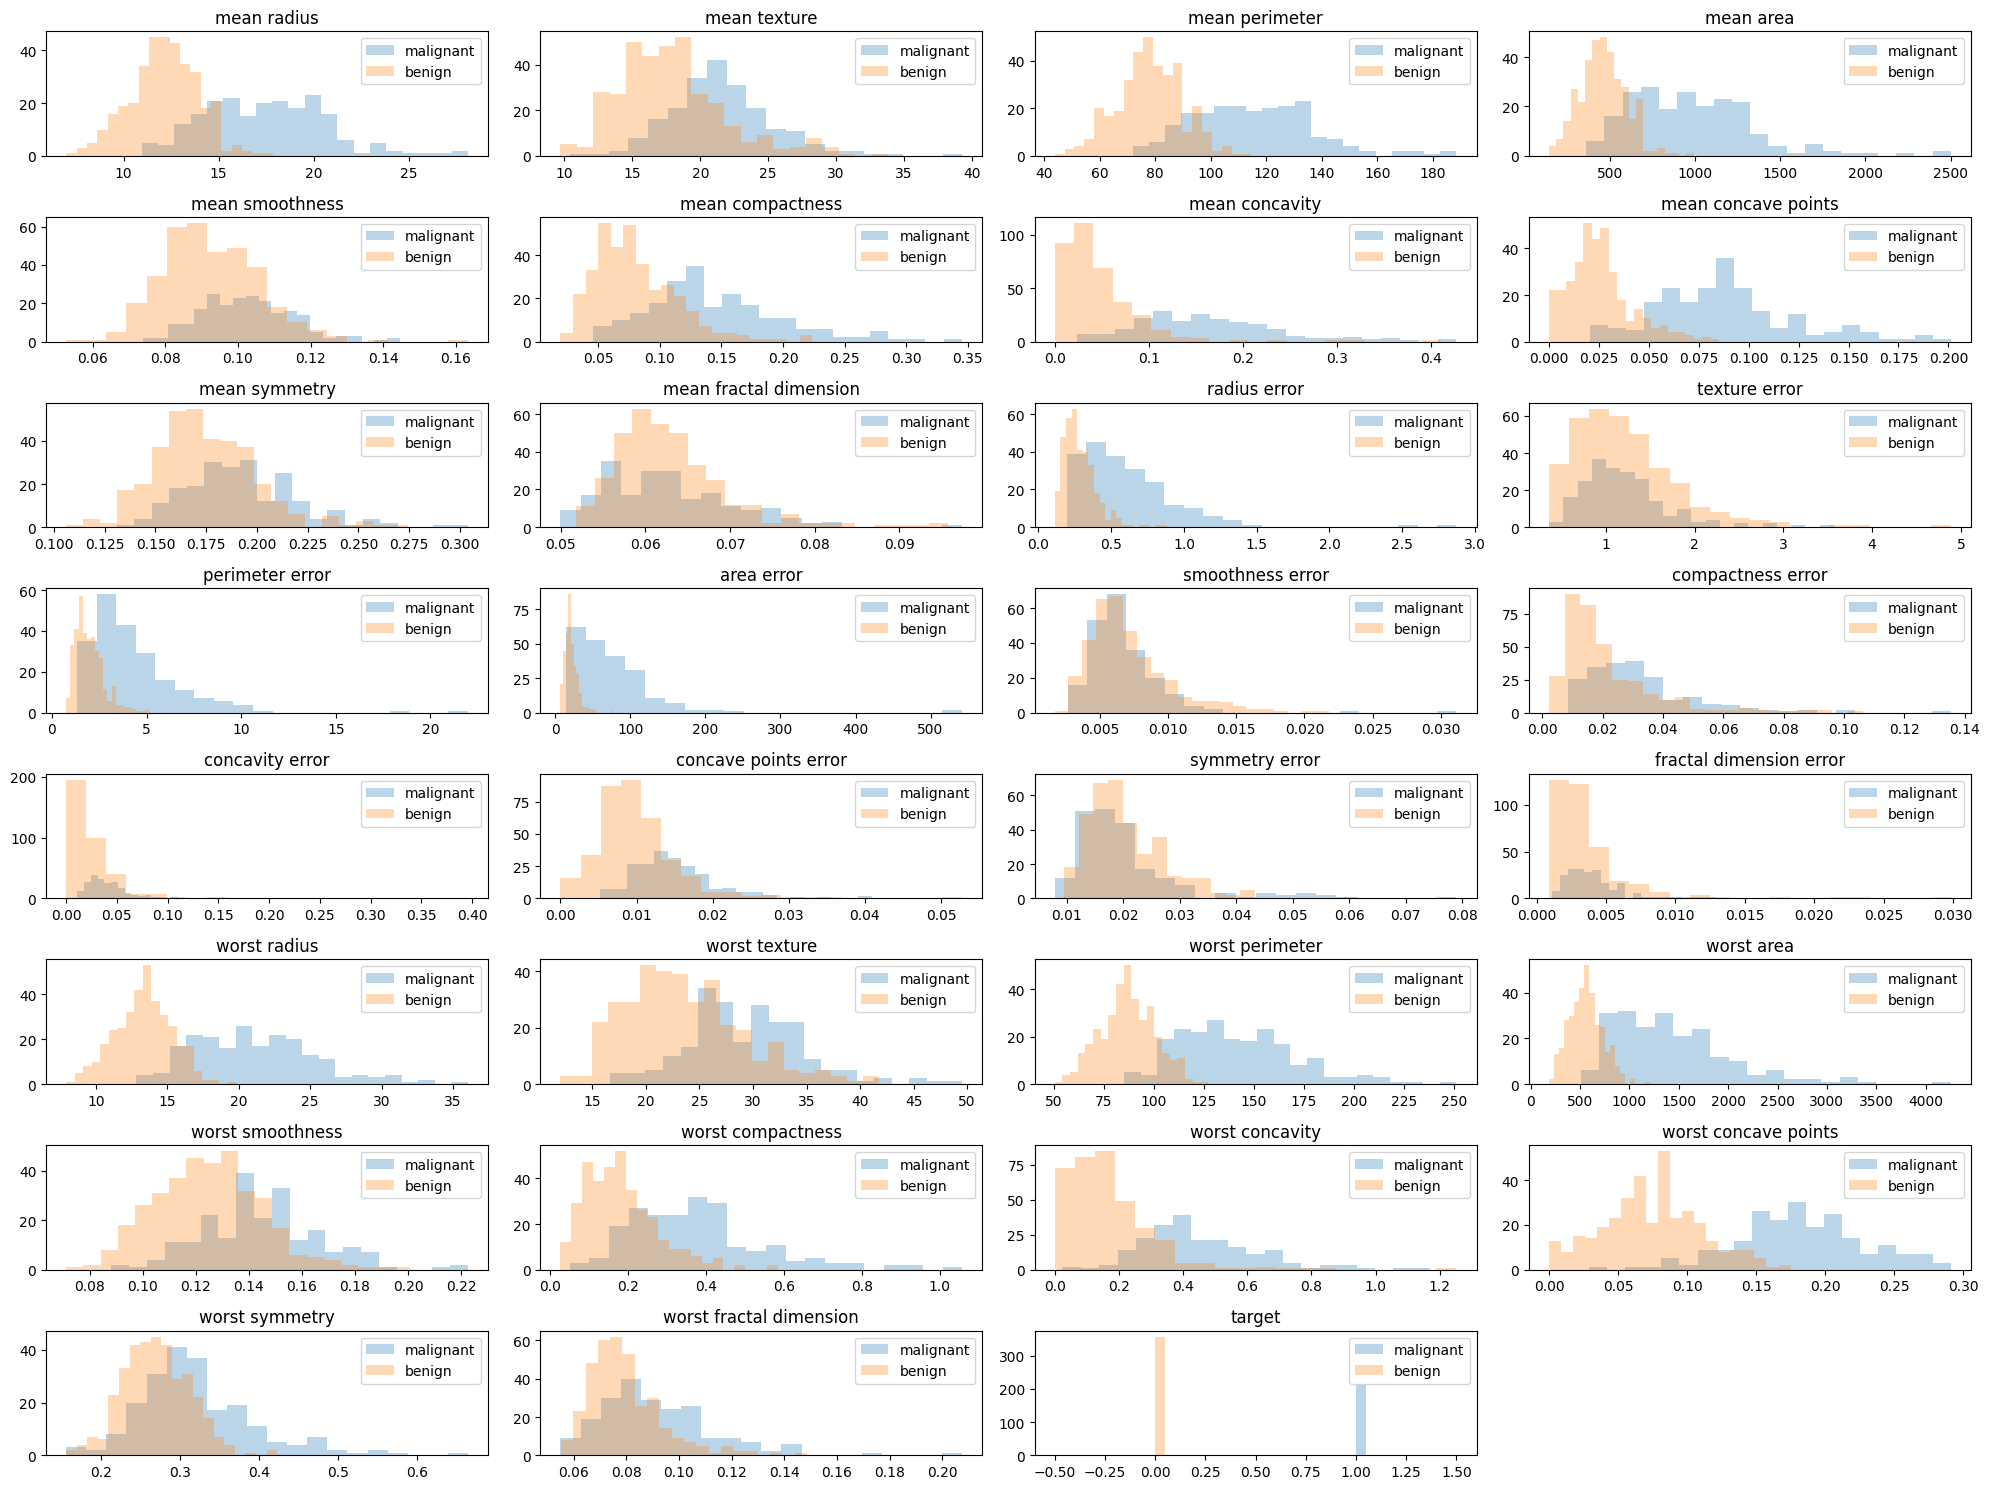

In [20]:
""" 변수 별 Class 분포 확인 """

"""
각 변수 별 유방암(Y=1)인 경우와 정상(Y=0)인 경우를 히스토그램으로 표현
"""

plt.figure(figsize=[20, 15])

for i, colname in enumerate(data.columns):
    plt.subplot(8, 4, i+1) ### 32개의 그래프 중 i번째 그래프 그리기
    plt.hist(malignant[colname],bins=20, alpha=0.3) ### bins: 전체 구간을 20개의 막대로 나눔 // alpha: 투명도
    plt.hist(benign[colname], bins=20 ,alpha=0.3)
    plt.title(colname) 
    plt.legend(['malignant', 'benign']) ### 범례 설정 
    plt.tight_layout()

## **2. 데이터 분할 및 스케일링**

In [21]:
""" 학습데이터와 평가데이터 분할 """

"""
학습데이터(70%)와 평가데이터(30%)를 구분
 - test_size: 분할 비율 설정
 - random_state: 랜덤성 제어
"""

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3,
                                                   random_state=2025)

print(f'X_train: {X_train.shape} | X_test: {X_test.shape} | y_train: {y_train.shape} | y_test: {y_test.shape}')
X_train

X_train: (398, 30) | X_test: (171, 30) | y_train: (398, 1) | y_test: (171, 1)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
251,11.500,18.45,73.28,407.4,0.09345,0.05991,0.026380,0.020690,0.1834,0.05934,...,12.970,22.46,83.12,508.9,0.11830,0.10490,0.08105,0.06544,0.2740,0.06487
240,13.640,15.60,87.38,575.3,0.09423,0.06630,0.047050,0.037310,0.1717,0.05660,...,14.850,19.05,94.11,683.4,0.12780,0.12910,0.15330,0.09222,0.2530,0.06510
185,10.080,15.11,63.76,317.5,0.09267,0.04695,0.001597,0.002404,0.1703,0.06048,...,11.870,21.18,75.39,437.0,0.15210,0.10190,0.00692,0.01042,0.2933,0.07697
17,16.130,20.68,108.10,798.8,0.11700,0.20220,0.172200,0.102800,0.2164,0.07356,...,20.960,31.48,136.80,1315.0,0.17890,0.42330,0.47840,0.20730,0.3706,0.11420
119,17.950,20.01,114.20,982.0,0.08402,0.06722,0.072930,0.055960,0.2129,0.05025,...,20.580,27.83,129.20,1261.0,0.10720,0.12020,0.22490,0.11850,0.4882,0.06111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,7.760,24.54,47.92,181.0,0.05263,0.04362,0.000000,0.000000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.00000,0.00000,0.2871,0.07039
160,11.750,20.18,76.10,419.8,0.10890,0.11410,0.068430,0.037380,0.1993,0.06453,...,13.320,26.21,88.91,543.9,0.13580,0.18920,0.19560,0.07909,0.3168,0.07987
211,11.840,18.94,75.51,428.0,0.08871,0.06900,0.026690,0.013930,0.1533,0.06057,...,13.300,24.99,85.22,546.3,0.12800,0.18800,0.14710,0.06913,0.2535,0.07993
323,20.340,21.51,135.90,1264.0,0.11700,0.18750,0.256500,0.150400,0.2569,0.06670,...,25.300,31.86,171.10,1938.0,0.15920,0.44920,0.53440,0.26850,0.5558,0.10240


In [22]:
""" X변수들을 각 변수 단위로 표준 정규화 """

"""
정규화
 - 일반적으로 학습데이터에 대해 각 변수 별 정규화 상수를 구함
 - 이후, 테스트 데이터에는 학습 데이터에서 구한 정규화상수를 그대로 적용하여 정규화 수행
  * 평가데이터는 기존에 본 적이 없는 데이터라고 가정하기 때문

함수 설명
 - fit_transform: 각 변수의 표준화 상수 산출 (fit) + 정규화 수행(transform)
 - transform: 기존에 fit된 표준화 상수를 활용하여 정규화만 수행 (transform)
"""

scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) ### train 데이터로 정규화 상수 산출 및 train 데이터 정규화
X_test = scaler.transform(X_test) ### train 데이터로 구한 정규화 상수로 test 데이터 정규화

X_train = pd.DataFrame(X_train, columns = X.columns) ### 가독성을 위해 dataframe으로 변환
X_test = pd.DataFrame(X_test, columns = X.columns)

X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-0.737491,-0.238495,-0.760071,-0.691304,-0.180013,-0.819555,-0.775649,-0.720349,0.108158,-0.460771,...,-0.676007,-0.548644,-0.709511,-0.641306,-0.600833,-0.914421,-0.895403,-0.749164,-0.259306,-1.026101
1,-0.122955,-0.898877,-0.172502,-0.212532,-0.124380,-0.695885,-0.512759,-0.280009,-0.323380,-0.849660,...,-0.283039,-1.085670,-0.380002,-0.335508,-0.188012,-0.762064,-0.555742,-0.334337,-0.610971,-1.013355
2,-1.145267,-1.012416,-1.156784,-0.947657,-0.235646,-1.070380,-1.090850,-1.204830,-0.375017,-0.298970,...,-0.905935,-0.750225,-0.941277,-0.767305,0.867940,-0.933308,-1.243902,-1.601432,0.063891,-0.355532
3,0.592090,0.278224,0.690932,0.424786,1.499670,1.934289,1.078952,1.455125,1.325316,1.557478,...,0.994108,0.871877,0.899957,0.771323,2.032529,1.090144,0.972615,1.448269,1.358355,1.707715
4,1.114733,0.122977,0.945129,0.947187,-0.852599,-0.678079,-0.183606,0.214116,1.196223,-1.750917,...,0.914678,0.297054,0.672089,0.676693,-1.083181,-0.818096,-0.219137,0.072744,3.327681,-1.234476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,-1.811494,1.172635,-1.816862,-1.336891,-3.091463,-1.134828,-1.111161,-1.268523,-0.802866,-0.531736,...,-1.410523,0.697068,-1.427895,-1.062414,-1.832342,-1.169147,-1.276434,-1.762839,-0.039934,-0.720189
394,-0.665699,0.162368,-0.642558,-0.655945,0.921945,0.229224,-0.240839,-0.278154,0.694607,0.275848,...,-0.602848,0.041928,-0.535912,-0.579971,0.159627,-0.383689,-0.356881,-0.537723,0.457422,-0.194817
395,-0.639855,-0.124956,-0.667144,-0.632562,-0.518089,-0.643630,-0.771706,-0.899453,-1.002038,-0.286196,...,-0.607028,-0.150205,-0.646548,-0.575765,-0.179321,-0.391244,-0.584889,-0.692005,-0.602598,-0.191492
396,1.801060,0.470546,1.849401,1.751319,1.499670,1.649789,2.151115,2.716269,2.819100,0.583836,...,1.901279,0.931722,1.928362,1.863084,1.176469,1.253204,1.235881,2.396266,4.459708,1.053772


## **3. 모델링**

#### **3-1. 모델 학습 (파라미터 도출)**

In [23]:
""" 모델 학습 (파라미터 산출) """
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

#### **3-2. 모델 결과해석**
 - 로지스틱 회귀모형의 β0, β1, β2 ...를 활용한 결과 해석

In [24]:
""" 산출된 β0값 확인 """
print(model.intercept_)

[-0.22477921]


In [25]:
""" 산출된 β1, β2, β3...값 확인 """
print(model.coef_)

[[ 0.48788185  0.20562426  0.4366354   0.50412753  0.13158653 -0.43685082
   0.52033835  0.90047121 -0.29627968 -0.34185307  1.10826053 -0.2279361
   0.3968252   0.72741891  0.34322432 -0.7240498   0.00947755  0.13475957
  -0.20475532 -0.64979541  1.08445646  1.24868752  0.7740182   0.95395493
   0.85348702  0.1385783   0.62990999  0.95624818  0.77774502  0.43521919]]


In [26]:
""" β값 분석 """

"""
exp(β)값을 활용하여 odds를 통한 변수 해석
 - βi > 0 --> exp(β) > 1 --> 유방암일 확률 > 유방암이 아닐 확률
 - βi < 0 --> exp(β) < 1 --> 유방암일 확률 < 유방암이 아닐 확률
   => 즉, "βi > 0" 인 변수를 유의해서 보아야 한다!
   
아래 값들의 의미
 - beta: βi
 - odds: exp(βi)
 - interpret: odds > 1 여부
 - column_name: 변수명
"""

beta = np.concatenate([model.intercept_, model.coef_.reshape(-1)]).round(2) ### β0, β1, β2 ... 를 모두 합치기
odds = np.exp(beta).round(2) ### odds(승산) 산출 (odds = exp(β))
interpret = np.where(beta > 0, 'risky', 'protective') ### beta>0(=odds>1)이면 'risky' 할당, 그렇지 않으면 'protective' 할당
column_name = ["const"] + breast_cancer.feature_names.tolist()

beta_analysis = pd.DataFrame(np.c_[beta, odds, interpret],
                             index=column_name,
                             columns=['beta', 'exp(beta)', 'interpret'])
beta_analysis

,beta,exp(beta),interpret
const,-0.22,0.8,protective
mean radius,0.49,1.63,risky
mean texture,0.21,1.23,risky
mean perimeter,0.44,1.55,risky
mean area,0.5,1.65,risky
mean smoothness,0.13,1.14,risky
mean compactness,-0.44,0.64,protective
mean concavity,0.52,1.68,risky
mean concave points,0.9,2.46,risky
mean symmetry,-0.3,0.74,protective


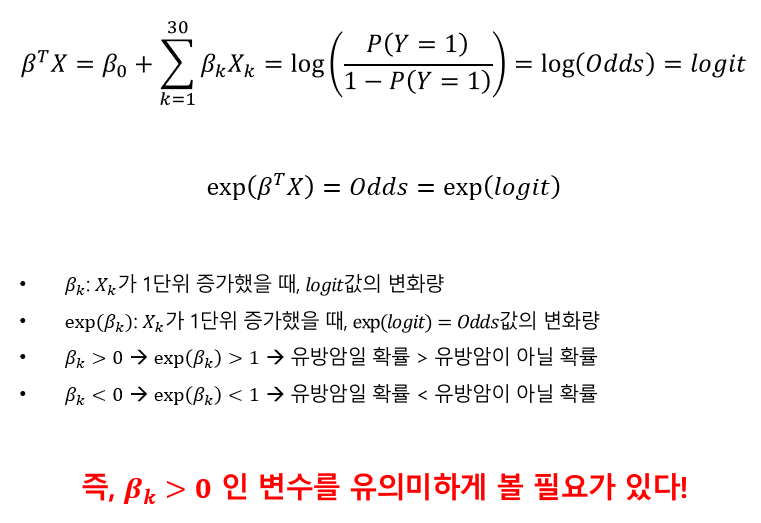

In [ ]:
""" 설명 장표 불러오기 """
# Image('image/image11.PNG') ### 로컬 사용시
Image('/content/2025-LGElec-Day2/image/image11.PNG') ### colab 사용시

#### **3-4. 모델평가**

In [28]:
""" test 데이터에 대한 예측값 산출 (패키지) """

"""
[확률1, 확률2]
 - 확률1: X_test에 대한 P(Y=0) 예측 확률값 
 - 확률2: X_test에 대한 P(Y=1) 예측 확률값
  ** 확률1 + 확률2 = 1
"""

model_pred = model.predict_proba(X_test)
model_pred[:10].round(2) ### 10개의 결과만 확인 (반올림 둘째자리까지)

array([[1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.97, 0.03],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [ ]:
""" test 데이터에 대한 예측값 산출 (직접 계산 & 패키지 계산) """

"""
1. (component_x) x (component_beta) = Xbeta
2. P(Y=1) = 1 / (1+exp(-Xbeta))
"""

""" 직접 계산 """
component_x = np.c_[np.ones(X_test.shape[0]), X_test] ### np.ones(X_test.shape[0]): 상수항을 고려해주기 위함 --> shape: (171, 1) + (171, 30) = (171, 31)
component_beta = beta.reshape(-1, 1) ### 행렬에 맞게 변환 --> shape: (31, 1)
Xbeta = np.matmul(component_x, component_beta) ### shape: (171, 1)
P_1_human = 1 / (1 + np.exp(-Xbeta)) ### P(Y=1)

""" 패키지 연산 """
P_1_package = model_pred[:, 1].reshape(-1, 1)

""" Summary """
pd.DataFrame(np.concatenate([P_1_human, P_1_package],axis=1),
            columns=['직접계산', '패키지계산'])

,직접계산,패키지계산
0,0.000965,0.000960
1,1.000000,1.000000
2,0.999999,0.999999
3,0.007561,0.007347
4,1.000000,1.000000
...,...,...
166,0.002272,0.002251
167,0.000080,0.000079
168,0.007658,0.007662
169,0.739112,0.739333


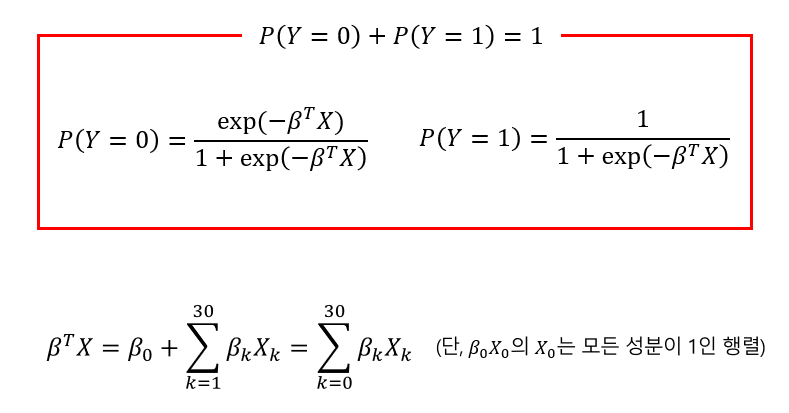

In [ ]:
""" 설명 장표 불러오기 """
# Image('image/image12.PNG') ### 로컬 사용시
Image('/content/2025-LGElec-Day2/image/image12.PNG') ### colab 사용시

In [31]:
""" Cutoff를 변화하며 성능 변화 관찰 """
cutoffs = np.linspace(0, 1, 11) ### (0, 0.1, 0.2 ... 0.9, 1.0)
for cutoff in cutoffs:
    y_pred = np.where(P_1_package.reshape(-1) >= cutoff, 1, 0) ### 확률값이 cufoff보다 크면 1(유방암o), 아니면 0(유방암x)
    acc = accuracy_score(y_test, y_pred) ### 정확도
    recall = recall_score(y_test, y_pred) ### 민감도
    precision = precision_score(y_test, y_pred) ### 정밀도
    
    print(f"cutoff:{cutoff:0.2f}", f"정확도:{acc:0.2f}", f"민감도:{recall:0.2f}", f"정밀도:{precision:0.2f}", sep='  |  ')  

cutoff:0.00  |  정확도:0.37  |  민감도:1.00  |  정밀도:0.37
cutoff:0.10  |  정확도:0.92  |  민감도:1.00  |  정밀도:0.83
cutoff:0.20  |  정확도:0.96  |  민감도:1.00  |  정밀도:0.90
cutoff:0.30  |  정확도:0.96  |  민감도:1.00  |  정밀도:0.91
cutoff:0.40  |  정확도:0.97  |  민감도:1.00  |  정밀도:0.93
cutoff:0.50  |  정확도:0.98  |  민감도:0.98  |  정밀도:0.95
cutoff:0.60  |  정확도:0.99  |  민감도:0.98  |  정밀도:0.98
cutoff:0.70  |  정확도:0.98  |  민감도:0.95  |  정밀도:1.00
cutoff:0.80  |  정확도:0.97  |  민감도:0.92  |  정밀도:1.00
cutoff:0.90  |  정확도:0.97  |  민감도:0.92  |  정밀도:1.00
cutoff:1.00  |  정확도:0.63  |  민감도:0.00  |  정밀도:0.00


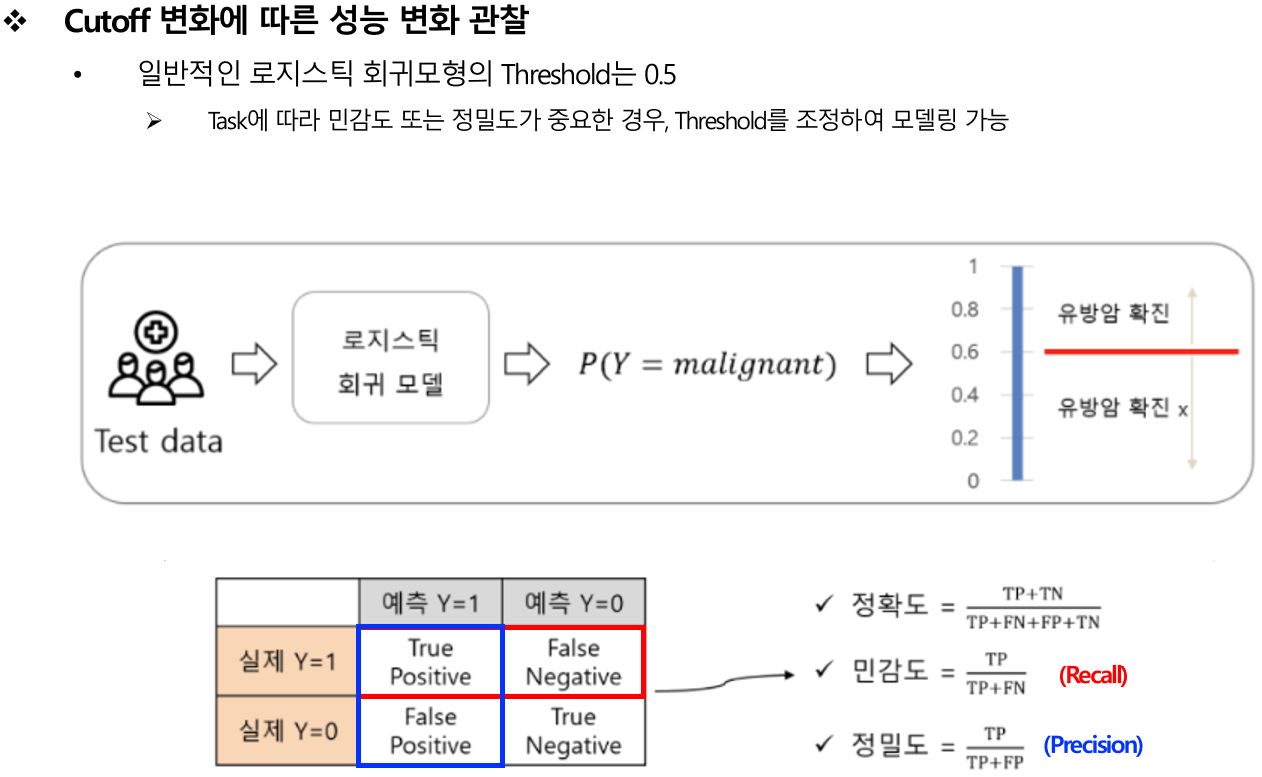

In [ ]:
""" 설명 장표 불러오기 """
# Image('image/image13.PNG') ### 로컬 사용시
Image('/content/2025-LGElec-Day2/image/image13.PNG') ### colab 사용시

# **EOD**